# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Funtional Loops

Distribution of fun_loops by motif

    C GEN4 +
    D GEN3 +
    E GEN3 + GEN4 +
    F GEN3 GEN4 + GEN3 +
    G GEN3 GEN4 - GEN3 +
    H GEN3 GEN4 + GEN4 +
    I GEN3 GEN4 - GEN4 +
    J GEN1 GEN2 - GEN1 +

In [2]:
loops = []
df_loops = pd.DataFrame(index=[1,2,3,4], columns=['C','D','E','F','G','H','I','J'])
df_loops = df_loops.fillna(0)
with open("5nodos/Loops_Functionality.csv") as f:
    for line in f.readlines(): 
        line = line.strip().split(',')
        if line[-1] != '': 
            loops.append(   (line[0], line[1])   )
            m = int(line[0][0])
            df_loops[line[1]][m] += 1    
df_loops

,C,D,E,F,G,H,I,J
1,184,172,8,8,8,20,20,16
2,184,172,8,8,8,20,20,16
3,188,180,8,8,8,20,20,16
4,188,180,8,8,8,20,20,16


Este patrón esta raro, por que todos los motifs tienen una distribución similar de loops funcionales, para 3 nodos no fue asi. 

## Distance distribution

Distribution of topological distances

Create histograms

In [3]:
#d_top = {}
#d_dyn = {}
#d_vs_d = {}

#with open("5nodos/crossdistances.out") as f:
#    for line in f:
#        line = line.strip().split(',')
#        if line[2] in d_top: d_top[line[2]] += 1
#        else: d_top[line[2]] = 1
#        if line[3] in d_dyn: d_dyn[line[3]] += 1
#        else: d_dyn[line[3]] = 1
#        if (line[2], line[3]) in d_vs_d: d_vs_d[(line[2], line[3])] += 1
#        else: d_vs_d[(line[2], line[3])] = 1
with open("5nodos/res5nodos.dat") as f:
    for line in f: exec(line)

sorted(d_top, key=lambda key:d_top[key])
sorted(d_dyn, key=lambda key:d_dyn[key])
sorted(d_vs_d, key=lambda key:d_vs_d[key])

print(' ')


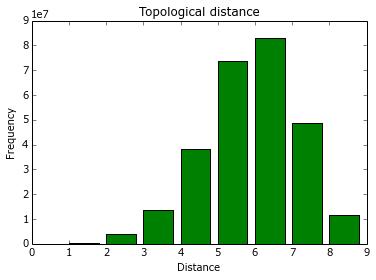

In [4]:
plt.bar(list(d_top.keys()), list(d_top.values()), color='g' )
plt.title("Topological distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

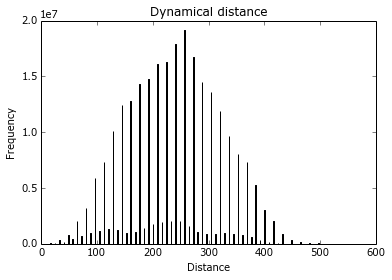

In [5]:
plt.bar(list(d_dyn.keys()), list(d_dyn.values()), width=1, color='b' )
plt.title("Dynamical distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

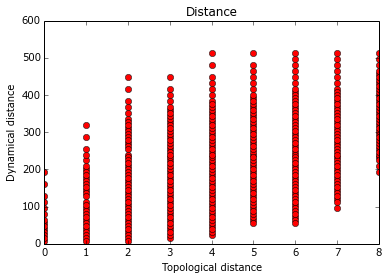

In [6]:
x = [d[0] for d in d_vs_d.keys()]
y = [d[1] for d in d_vs_d.keys()]
plt.plot(x, y, 'ro')
plt.title("Distance")
plt.xlabel("Topological distance")
plt.ylabel("Dynamical distance")
plt.show()

## Network

Separate d_top = 0

## Dendogram

Clustering!

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()